# Analysis of fitness Data

## Task 1 - Obtain and review raw data

In [1]:
import pandas as pd

runkeeper_file='/Users/itsdeepans/Downloads/Analyze Your Runkeeper Fitness Data/datasets/cardioActivities.csv'

df_activities=pd.read_csv(runkeeper_file,parse_dates=['Date'],index_col='Date')

display(df_activities.sample(3))

df_activities.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-08-12 17:37:17,fa9f57d9-4995-4efe-9eb8-00983fde4486,Running,NaN,22.09,2:13:22,6:02,9.94,1652.0,342,148.0,NaN,NaN,2018-08-12-173717.gpx
2017-06-04 16:01:52,f607c11e-85ad-492d-9cd3-df2f41d60c24,Running,NaN,21.02,2:02:14,5:49,10.32,1482.0,330,138.0,NaN,TomTom MySports Watch,2017-06-04-160152.gpx
2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

## Task 2 - Data preprocessing

In [2]:
cols_to_drop=['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned','Notes']

df_activities=df_activities.drop(columns=cols_to_drop)

display(df_activities['Type'].unique())

df_activities['Type']=df_activities['Type'].replace('Other','Unicycling')

display(df_activities['Type'].unique())

display(df_activities['Type'].value_counts())

missing=df_activities.isnull().sum()

print(missing)

array(['Running', 'Cycling', 'Other', 'Walking'], dtype=object)

array(['Running', 'Cycling', 'Unicycling', 'Walking'], dtype=object)

Type
Running       459
Cycling        29
Walking        18
Unicycling      2
Name: count, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


## Type 3 - Dealing with missing values

In [3]:
import warnings
warnings.filterwarnings('ignore')

avg_hr_cycle=df_activities[df_activities['Type']=='Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_run=df_activities[df_activities['Type']=='Running']['Average Heart Rate (bpm)'].mean()
avg_hr_walk=df_activities[df_activities['Type']=='Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_unicycle=df_activities[df_activities['Type']=='Unicycling']['Average Heart Rate (bpm)'].mean()

df_cycle=df_activities[df_activities['Type']=='Cycling'].copy()
df_run=df_activities[df_activities['Type']=='Running'].copy()
df_walk=df_activities[df_activities['Type']=='Walkking'].copy()
df_unicycle=df_activities[df_activities['Type']=='Unicycling'].copy()

df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle),inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run),inplace=True)
df_walk['Average Heart Rate (bpm)'].fillna((110),inplace=True)
df_unicycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_unicycle),inplace=True)

missing_run=df_run.isnull().sum()

print(missing_run)

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


## Task 4 - Plot running data

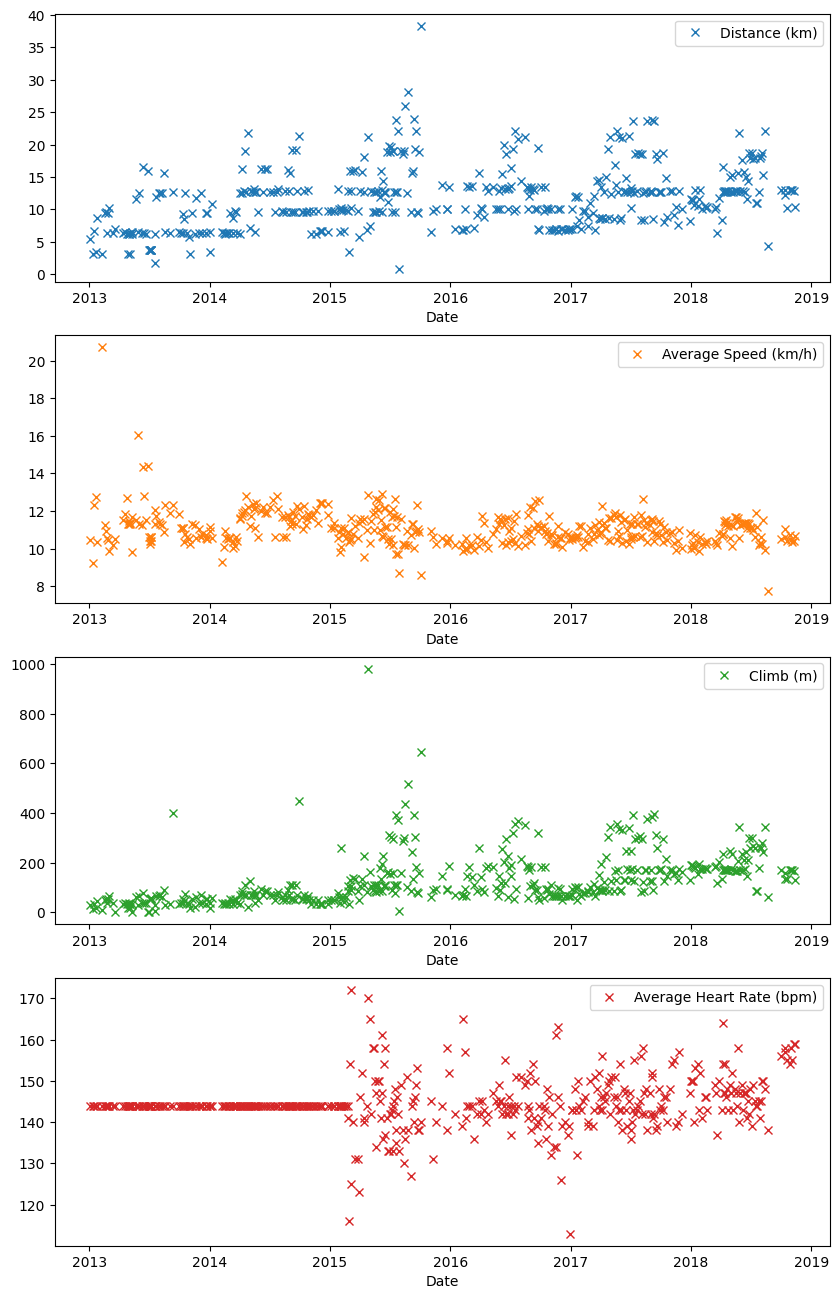

In [4]:
import matplotlib.pyplot as plt

df_run.sort_index(inplace=True)

runs_subset_2013_2018 = df_run['2013':'2018']

runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(10,16),
                           linestyle='none',
                           marker='x')

plt.show()

## Task 5 - Running statistics

In [5]:
import numpy as np

df_run.index = pd.to_datetime(df_run.index)

runs_subset_2015_2018 = df_run['2015':'2018']

numeric_cols = runs_subset_2015_2018.select_dtypes(include=[np.number]).columns
runs_subset_2015_2018_numeric = runs_subset_2015_2018[numeric_cols]

specific_columns = ['Distance (km)', 'Average Speed (km/h)', 'Climb (m)','Average Heart Rate (bpm)']

print('How my average run looks in the last 4 years:')
display(runs_subset_2015_2018_numeric[specific_columns].resample('A').mean())

print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018_numeric[specific_columns].resample('W').mean().mean())

weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)


How my average run looks in the last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

How many trainings per week I had on average: 1.5


## Task 6 - Visualization with averages

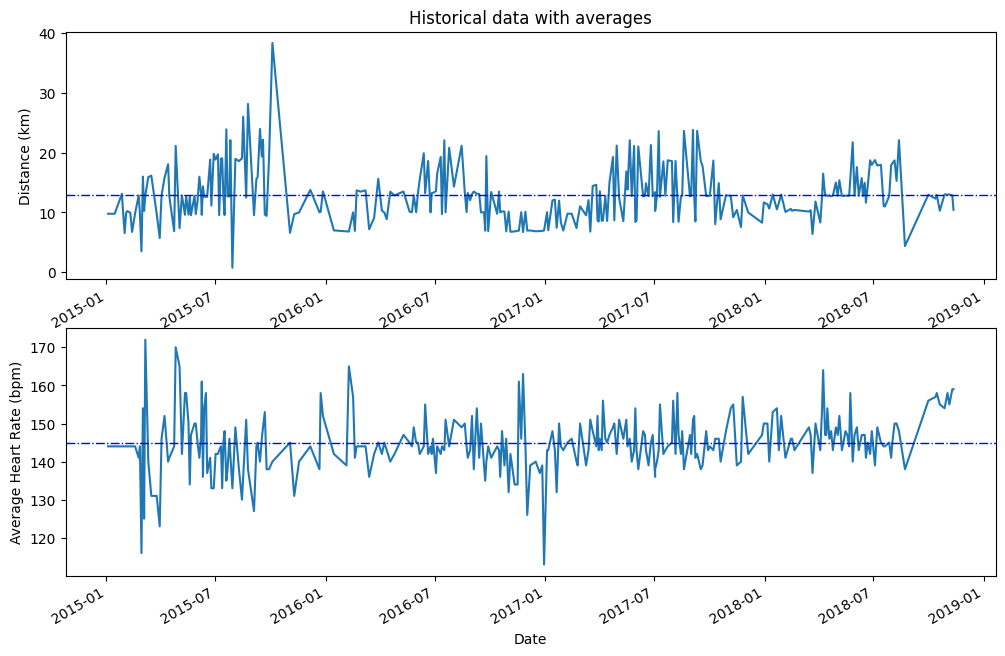

In [6]:
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12, 8))

runs_distance.plot(ax=ax1)
ax1.set(xlabel='Date',ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

runs_hr.plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

plt.show()

## Task 7 - Did I reach my goal?

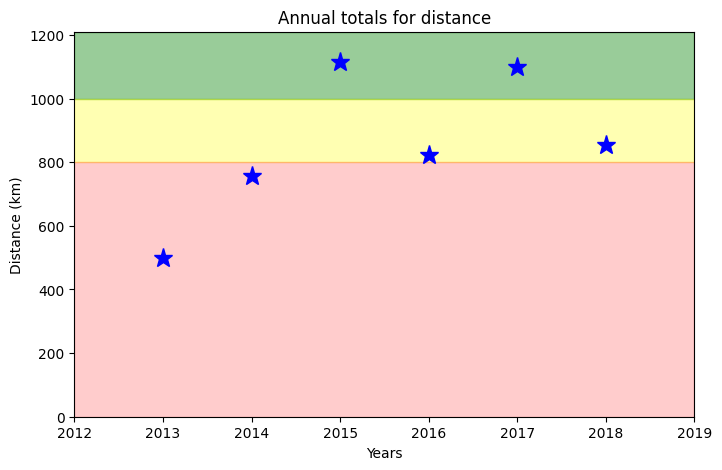

In [7]:
df_run_dist_annual = df_run['2013':'2018']['Distance (km)'].resample('YE').sum()

fig = plt.figure(figsize=(8, 5))

ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

plt.show()

## Task 8 - Am I progressing

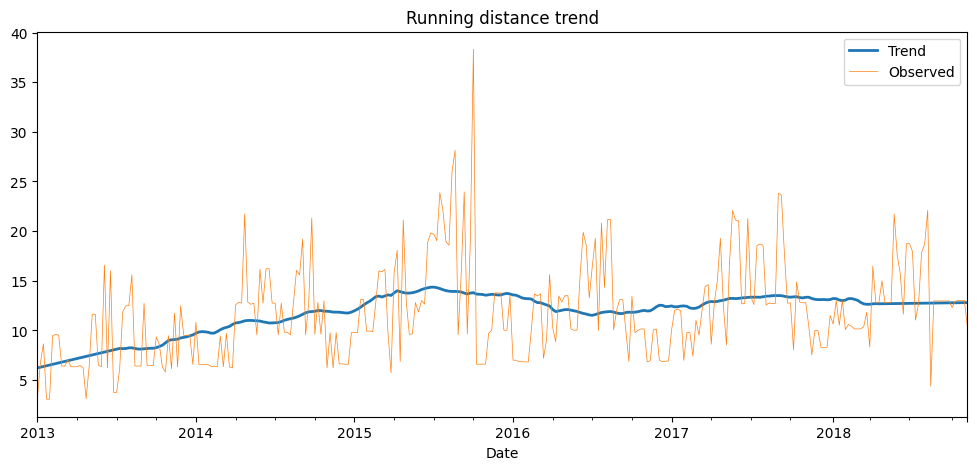

In [8]:
import statsmodels.api as sm

df_run_dist_wkly = df_run['2013':'2018']['Distance (km)'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

fig = plt.figure(figsize=(12, 5))

ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

plt.show()

## Task 9 - Training intensity

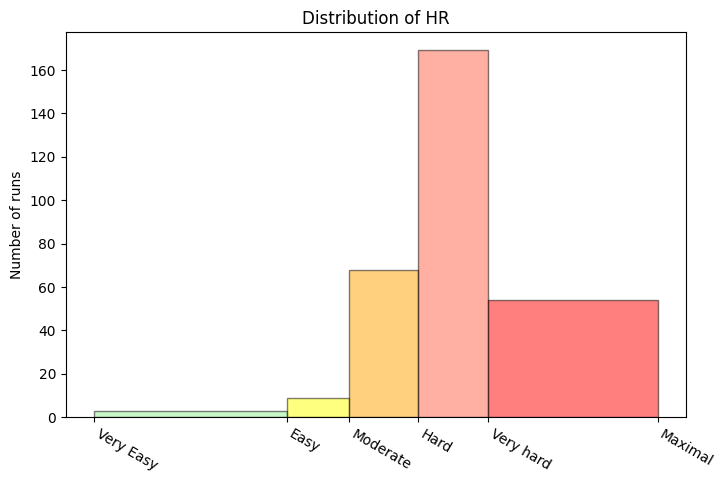

In [9]:
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Very Easy', 'Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['lightgreen', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2015':'2018']['Average Heart Rate (bpm)']

fig, ax = plt.subplots(figsize=(8, 5))

n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

plt.show()


## Task -10 Detailed summary report

In [10]:
df_walk=df_activities[df_activities['Type']=='Walking'].copy()
df_run_walk_cycle = pd.concat([df_run, df_cycle, df_walk]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)
 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack(future_stack=True)

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Distance (km)     Climb (m)  Average Speed (km/h)
Type                                                            
Cycling count      29.000000     29.000000             29.000000
        mean       23.468276    240.551724             19.125172
        std         9.451040    128.960289              3.257100
        min        11.410000     58.000000             11.380000
        25%        15.530000    139.000000             16.980000
        50%        20.300000    199.000000             19.500000
        75%        29.400000    318.000000             21.490000
        max        49.180000    553.000000             24.330000
        total     680.580000   6976.000000                   NaN
Running count     459.000000    459.000000            459.000000
        mean       11.382353    124.788671             11.056296
        std         4.937853    103.382177              0.953273
        min         0.760000      0.000000              5.770000
        25%         7.415000     54.000000             10.495000
        50%        10.810000     91.000000             10.980000
        75%        13.190000    171.000000             11.520000
        max        38.320000    982.000000             20.720000
        total    5224.500000  57278.000000                   NaN
Walking count      18.000000     18.000000             18.000000
        mean        1.858333     19.388889              5.549444
        std         0.880055     27.110100              1.459309
        min         1.220000      5.000000              1.040000
        25%         1.385000      7.000000              5.555000
        50%         1.485000     10.000000              5.970000
        75%         1.787500     15.500000              6.512500
        max         4.290000    112.000000              6.910000
        total      33.450000    349.000000                   NaN

## Task 11 - Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [11]:
average_shoes_lifetime = 5224 / 7

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = int(24700 / average_shoes_lifetime)

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33 pairs of shoes!
